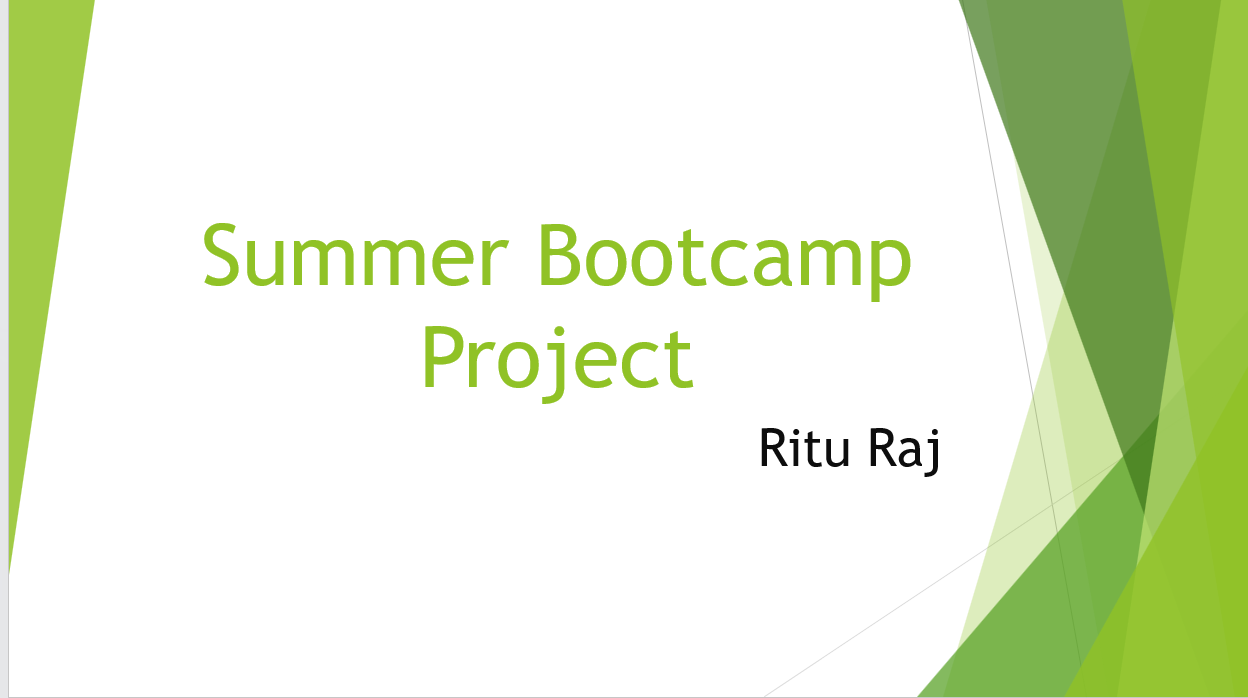

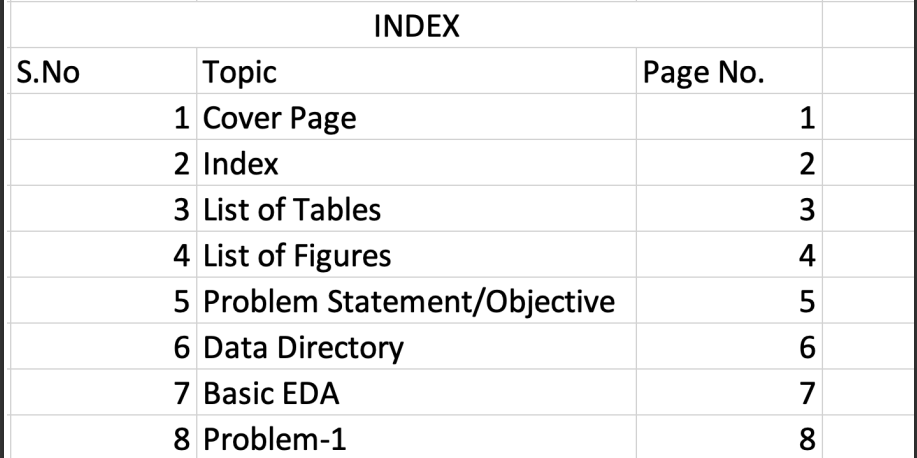

# PROBLEM STATEMENT

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of productsin 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

Data Description:
- Buyer/Spender- ID's of customers
- Region- Region of the distributor
- Fresh- spending on Fresh Vegetables
- Milk- spending on milk
- Grocery- spending on grocery
- Frozen- spending on frozen food
- Detergents_paper- spending on detergents and toilet paper
- Delicatessen- spending on instant foods






# BASIC STEPS

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df = pd.read_csv('/content/4-Wholesale_Customer_New[2].csv')


## 1-	Display the top 5 rows.

In [ ]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214.0,2674.0,1338.0
1,2,Retail,Other,7057,9810,9568,1762.0,3293.0,1776.0
2,3,Retail,Other,?,8808,7684,2405.0,3516.0,7844.0
3,4,Hotel,Other,13265,1196,4221,6404.0,507.0,1788.0
4,5,Retail,Other,22615,5410,7198,3915.0,1777.0,5185.0


## 2-	Display the last 5 rows

In [ ]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135.0,182.0,2204.0
436,437,Hotel,Other,39228,1431,764,4510.0,93.0,2346.0
437,438,Retail,Other,14531,15488,30243,437.0,14841.0,1867.0
438,439,Hotel,Other,10290,1981,2232,1038.0,168.0,2125.0
439,440,Hotel,Other,2787,1698,2510,65.0,477.0,52.0


## 3-	Check the shape of dataset

In [ ]:
shape = df.shape
print(f"The shape of the CSV file is: {shape}")

The shape of the CSV file is: (440, 9)


## 4-	Check the datatypes of each feature.

In [ ]:
data_types = df.dtypes

# Print the data types
print("Data types of each feature:")
print(data_types)

Data types of each feature:
Buyer/Spender         int64
Channel              object
Region               object
Fresh                object
Milk                  int64
Grocery               int64
Frozen              float64
Detergents_Paper    float64
Delicatessen        float64
dtype: object


## 5- Check the Statistical summary

In [ ]:
summary = df.describe()

print("Statistical summary of the dataset:")
print(summary)

Statistical summary of the dataset:
       Buyer/Spender           Milk       Grocery        Frozen  \
count     440.000000     440.000000    440.000000    437.000000   
mean      220.500000    6035.779545   7951.277273   3085.638444   
std       127.161315    8964.929649   9503.162829   4867.744145   
min         1.000000       1.000000      3.000000     25.000000   
25%       110.750000    1525.250000   2153.000000    744.000000   
50%       220.500000    3641.000000   4755.500000   1535.000000   
75%       330.250000    7217.500000  10655.750000   3570.000000   
max       440.000000  112400.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        439.000000    438.000000  
mean        3773.747153   1531.057078  
std        19364.886053   2825.044262  
min            3.000000      3.000000  
25%          256.500000    411.250000  
50%          813.000000    971.000000  
75%         3956.000000   1822.750000  
max       396100.000000  47943.000000  


## 6-	Check the null values

In [ ]:
null_values = df.isnull().sum()
print("Null values of each column:")
print(null_values)

Null values of each column:
Buyer/Spender       0
Channel             3
Region              6
Fresh               0
Milk                0
Grocery             0
Frozen              3
Detergents_Paper    1
Delicatessen        2
dtype: int64


## 7-	Check the duplicate values

In [ ]:
duplicate_values = df.duplicated()
number_of_duplicates = duplicate_values.sum()

# Print the number of duplicate values
print(f"Number of duplicate values: {number_of_duplicates}")


Number of duplicate values: 0


###  9-	Check the outliers and their authenticity

In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
print(outliers)


     Buyer/Spender Channel  Region   Fresh     Milk  Grocery   Frozen  \
2              3.0  Retail   Other       ?   8808.0   7684.0   2405.0   
4              5.0  Retail   Other   22615   5410.0   7198.0   3915.0   
17            18.0   Hotel   Other    5876   6157.0   2933.0    839.0   
22            23.0   Hotel   Other   31276   1917.0   4469.0   9408.0   
23            24.0  Retail   Other   26373  36423.0  22019.0   5154.0   
24            25.0  Retail   Other   22647   9776.0  13792.0   2915.0   
28            29.0  Retail   Other    4113  20484.0  25957.0   1158.0   
36            37.0   Hotel   Other   29955   4362.0   5428.0   1729.0   
40            41.0   Hotel   Other   24025   4332.0   4757.0   9510.0   
45            46.0  Retail   Other    5181  22044.0  21531.0   1740.0   
47            48.0  Retail   Other   44466  54259.0  55571.0   7782.0   
71            72.0   Hotel   Other   18291   1266.0  21042.0   5373.0   
87            88.0   Hotel   Other   43265   5025.0

### visualizsing using boxplot

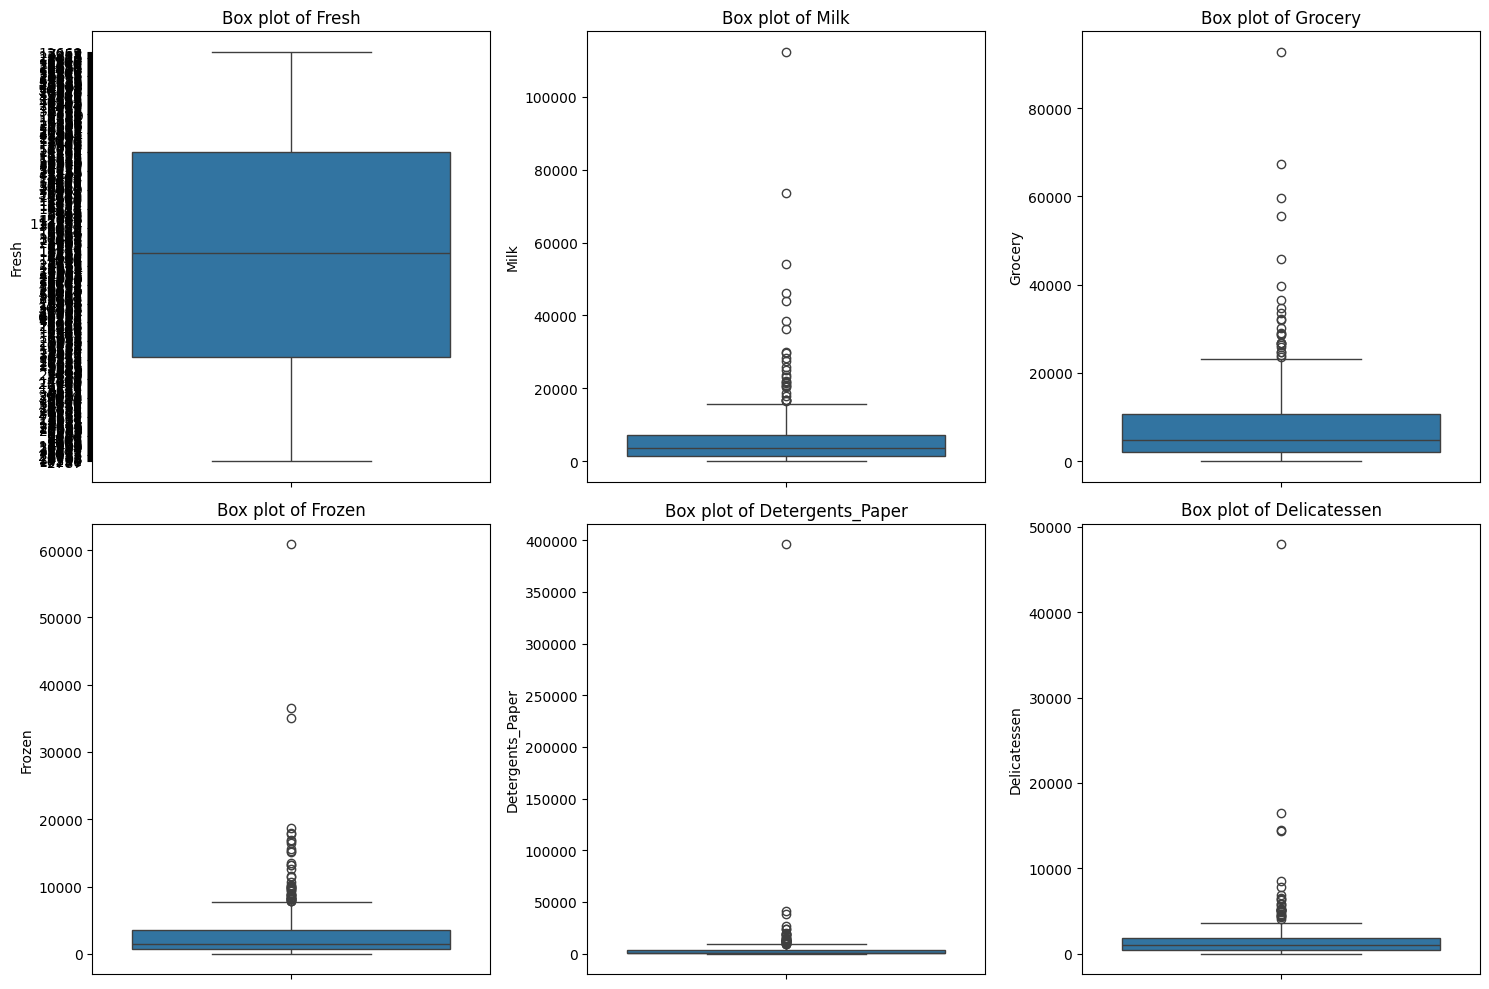

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

### 8-	Check the anomalies or wrong entries.

In [ ]:
anomalies = pd.concat([unrealistic_values, outliers]).drop_duplicates()

# Print all detected anomalies
print("\nAll detected anomalies:")
print(anomalies)


All detected anomalies:
     Buyer/Spender Channel  Region   Fresh     Milk  Grocery   Frozen  \
2              3.0  Retail   Other       ?   8808.0   7684.0   2405.0   
4              5.0  Retail   Other   22615   5410.0   7198.0   3915.0   
17            18.0   Hotel   Other    5876   6157.0   2933.0    839.0   
22            23.0   Hotel   Other   31276   1917.0   4469.0   9408.0   
23            24.0  Retail   Other   26373  36423.0  22019.0   5154.0   
24            25.0  Retail   Other   22647   9776.0  13792.0   2915.0   
28            29.0  Retail   Other    4113  20484.0  25957.0   1158.0   
36            37.0   Hotel   Other   29955   4362.0   5428.0   1729.0   
40            41.0   Hotel   Other   24025   4332.0   4757.0   9510.0   
45            46.0  Retail   Other    5181  22044.0  21531.0   1740.0   
47            48.0  Retail   Other   44466  54259.0  55571.0   7782.0   
71            72.0   Hotel   Other   18291   1266.0  21042.0   5373.0   
87            88.0   Hotel

### 10-	Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.

In [ ]:
print("Shape of the dataset beforee dropping duplicates:", df.shape)

df = df.drop_duplicates()

# Display the shape of the dataset after dropping duplicates
print("Shape of the dataset after dropping duplicates:", df.shape)

# Display the first few rows of the cleaned dataset
print("Cleaned dataset:")
print(df.head())

Shape of the dataset beforee dropping duplicates: (423, 7)
Shape of the dataset after dropping duplicates: (423, 7)
Cleaned dataset:
  Region    Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  Other  12669.0  9656.0   7561.0   214.0            2674.0       1338.00
1  Other   7057.0  9810.0   9568.0  1762.0            3293.0       1776.00
3  Other  13265.0  1196.0   4221.0  6404.0             507.0       1788.00
4  Other  22615.0  5410.0   7198.0  3915.0            1777.0       3938.75
5  Other   9413.0  8259.0   5126.0   666.0            1795.0       1451.00


In [ ]:
# Display the columns of the dataset before dropping unnecessary columns
print("Columns before dropping unnecessary ones:", df.columns)

# Drop unnecessary columns (e.g., 'Buyer/Spender' and 'Channel' if not needed for analysis)
df = df.drop(columns=['Buyer/Spender', 'Channel'], errors='ignore')

# Display the columns of the dataset after dropping unnecessary columns
print("Columns after dropping unnecessary ones:", df.columns)

# Display the first few rows of the cleaned dataset
print("Cleaned dataset:")
print(df.head())

Columns before dropping unnecessary ones: Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')
Columns after dropping unnecessary ones: Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')
Cleaned dataset:
  Region    Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  Other  12669.0  9656.0   7561.0   214.0            2674.0       1338.00
1  Other   7057.0  9810.0   9568.0  1762.0            3293.0       1776.00
3  Other  13265.0  1196.0   4221.0  6404.0             507.0       1788.00
4  Other  22615.0  5410.0   7198.0  3915.0            1777.0       3938.75
5  Other   9413.0  8259.0   5126.0   666.0            1795.0       1451.00


In [ ]:
# Display the number of missing values in each column before imputation
print("Missing values before imputation:")
print(df.isnull().sum())

# Impute missing values with the median of each column
numeric_columns = df.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='median')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])


# Display the number of missing values in each column after imputation
print("Missing values after imputation:")
print(df.isnull().sum())

# Display the first few rows of the cleaned dataset
print("Cleaned dataset:")
print(df.head())


Missing values before imputation:
Buyer/Spender       0
Channel             3
Region              6
Fresh               0
Milk                0
Grocery             0
Frozen              3
Detergents_Paper    1
Delicatessen        2
dtype: int64
Missing values after imputation:
Buyer/Spender       0
Channel             3
Region              6
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64
Cleaned dataset:
   Buyer/Spender Channel Region  Fresh    Milk  Grocery  Frozen  \
0            1.0  Retail  Other  12669  9656.0   7561.0   214.0   
1            2.0  Retail  Other   7057  9810.0   9568.0  1762.0   
2            3.0  Retail  Other      ?  8808.0   7684.0  2405.0   
3            4.0   Hotel  Other  13265  1196.0   4221.0  6404.0   
4            5.0  Retail  Other  22615  5410.0   7198.0  3915.0   

   Detergents_Paper  Delicatessen  
0            2674.0        1338.0  
1            3293.0

# 1. SPENDING ANALYSIS

### •	What is the total number of buyers in the dataset?

In [ ]:
total_buyers = df['Buyer/Spender'].nunique()
results = {
    "Total number of buyers": total_buyers}
results

{'Total number of buyers': 440}

###•	What is the average spending on each category (Fresh, Milk, Grocery, Frozen, Detergents_paper, Delicatessen)?

In [ ]:
df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']] = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].apply(pd.to_numeric, errors='coerce')
average_spending = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].mean()
results = {"Average spending on each category": average_spending.to_dict()}
results

{'Average spending on each category': {'Fresh': 12016.009132420091,
  'Milk': 6035.779545454546,
  'Grocery': 7951.277272727273,
  'Frozen': 3085.6384439359267,
  'Detergents_Paper': 3773.74715261959,
  'Delicatessen': 1531.0570776255709}}

### •	Which category has the highest average spending?

In [ ]:
highest_average_spending_category = average_spending.idxmax()
results = { "Category with highest average spending": highest_average_spending_category}
results

{'Category with highest average spending': 'Fresh'}

### •	How many buyers spend above the average on Fresh Vegetables?

In [ ]:
average_fresh_spending = average_spending['Fresh']
buyers_above_average_fresh = df[df['Fresh'] > average_fresh_spending]['Buyer/Spender'].nunique()
results = {"Number of buyers spending above the average on Fresh Vegetables": buyers_above_average_fresh}
results

{'Number of buyers spending above the average on Fresh Vegetables': 158}

# 2.REGIONAL DEMAND

### •	What is the total spending in each region?

In [ ]:
total_spending_by_region = df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum()
print("Total spending in each region:")
print(total_spending_by_region)

Total spending in each region:
            Fresh     Milk  Grocery    Frozen  Detergents_Paper  Delicatessen
Region                                                                       
Lisbon   845508.0   397328   534652  222550.0          577447.0       98496.0
Oporto   432343.0   232764   418529  173172.0          172339.0       50668.0
Other   3943458.0  1994145  2495251  927266.0          887089.0      511770.0


### •	Which region has the highest spending on Milk?

In [ ]:
highest_milk_spending_region = total_spending_by_region['Milk'].idxmax()
print("\nregion with higest spending on milk:")
print(highest_milk_spending_region)


region with higest spending on milk:
Other


### •	How does the average spending on Grocery vary across different regions?

In [ ]:
average_grocery_spending_by_region = df.groupby('Region')['Grocery'].mean()
print("\naverage spending on grocery by region:")
print(average_grocery_spending_by_region)


average spending on grocery by region:
Region
Lisbon    7128.693333
Oporto    9733.232558
Other     7896.363924
Name: Grocery, dtype: float64


### •	Which region has the highest average spending per buyer?

In [ ]:
total_spending_by_buyer_and_region = df.groupby(['Region', 'Buyer/Spender'])[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum()
average_spending_per_buyer_by_region = total_spending_by_buyer_and_region.groupby('Region').mean().sum(axis=1)

# Region with the highest average spending per buyer
highest_average_spending_region = average_spending_per_buyer_by_region.idxmax()

print("\nregion with the highest average spending per buyer:")
print(highest_average_spending_region)



region with the highest average spending per buyer:
Lisbon


# 3.CATEGORY PREFERENCE

###   Percentage of buyers spending more on Frozen food compared to Delicatessen

In [ ]:
more_frozen_than_deli = df[df['Frozen'] > df['Delicatessen']]
percentage_more_frozen_than_deli = (more_frozen_than_deli['Buyer/Spender'].nunique() / df['Buyer/Spender'].nunique()) * 100
print("percentage of buyers spending more on freozen food compared to delicatessen:")
print(percentage_more_frozen_than_deli)

percentage of buyers spending more on freozen food compared to delicatessen:
64.0909090909091


### •	Which category shows the most variation in spending among buyers?

In [ ]:
spending_variation = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].std()
most_variation_category = spending_variation.idxmax()
print("\ncategory with most variation in spending among buyers:")
print(most_variation_category)


category with most variation in spending among buyers:
Detergents_Paper


### •	Are there any regions where spending on Detergents_paper is significantly higher than others?

In [ ]:
average_spending_detergents_paper_by_region = df.groupby('Region')['Detergents_Paper'].mean()
print("\naverage spending on Detergents_paper by region:")
print(average_spending_detergents_paper_by_region)


average spending on Detergents_paper by region:
Region
Lisbon    7699.293333
Oporto    4007.883721
Other     2816.155556
Name: Detergents_Paper, dtype: float64


### •	What is the correlation between spending on Fresh and Frozen food?

In [ ]:
correlation_fresh_frozen = df['Fresh'].corr(df['Frozen'])
print("\ncorrelation between spending on fresh and frozen food:")
print(correlation_fresh_frozen)


correlation between spending on fresh and frozen food:
0.34546162205268055


# 4. CUSTOMER SEGMENTATION

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### •	Can buyers be grouped into segments based on their spending patterns? (e.g., using clustering analysis)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


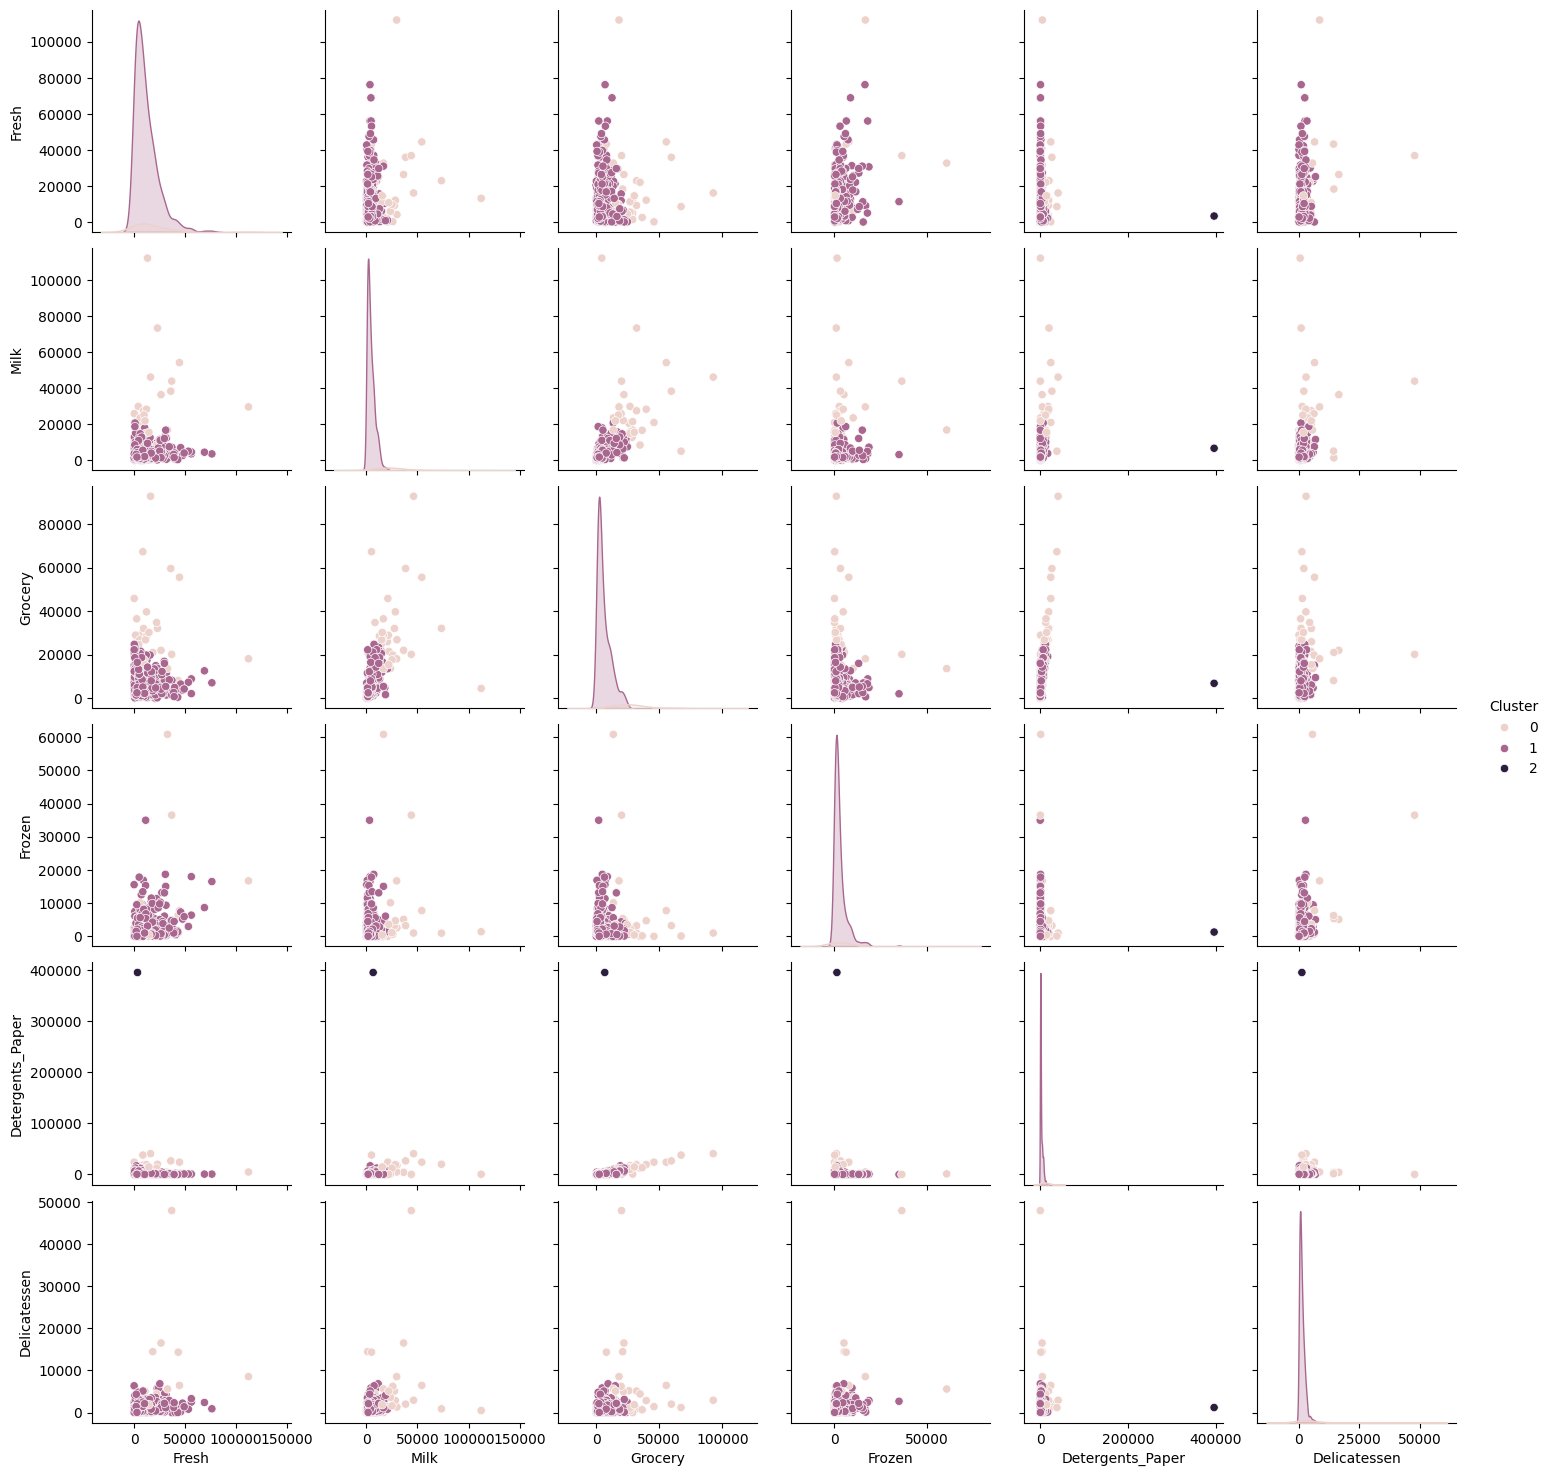

Clustering analysis - Cluster assignments:
   Buyer/Spender  Cluster
0              1        1
1              2        1
3              4        1
4              5        1
5              6        1


In [ ]:
# Convert 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen' columns to numeric, forcing errors to NaN
df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']] = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df.dropna(inplace=True)

# Standardize the spending data
spending_data = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']]
scaler = StandardScaler()
spending_data_scaled = scaler.fit_transform(spending_data)
kmeans = KMeans(n_clusters=3, random_state=0)  # You can change the number of clusters
df['Cluster'] = kmeans.fit_predict(spending_data_scaled)

# Visualize the clusters
sns.pairplot(df, hue='Cluster', vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'])
plt.show()
print("Clustering analysis - Cluster assignments:")
print(df[['Buyer/Spender', 'Cluster']].head())

### •	What are the characteristics of the top 10% spenders in each category?

In [ ]:
# 2. Characteristics of the top 10% spenders in each category
numeric_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

# Ensure all columns are numeric
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coerce errors to NaN

df.dropna(subset=numeric_columns, inplace=True)  # Drop rows with NaN in numeric columns

top_10_percent = df[numeric_columns].quantile(0.90)  # Calculate quantiles only on numeric columns

# Characteristics of the top 10% spenders
top_spenders = df[(df['Fresh'] > top_10_percent['Fresh']) |
                  (df['Milk'] > top_10_percent['Milk']) |
                  (df['Grocery'] > top_10_percent['Grocery']) |
                  (df['Frozen'] > top_10_percent['Frozen']) |
                  (df['Detergents_Paper'] > top_10_percent['Detergents_Paper']) |
                  (df['Delicatessen'] > top_10_percent['Delicatessen'])]

top_spenders_summary = top_spenders.describe()
print("\nCharacteristics of the top 10% spenders in each category:")
print(top_spenders_summary)


Characteristics of the top 10% spenders in each category:
       Buyer/Spender          Fresh           Milk       Grocery  \
count     152.000000     152.000000     152.000000    152.000000   
mean      209.098684   18035.473684   10481.980263  13273.967105   
std       128.705206   17553.456877   13561.268287  13370.331771   
min         5.000000       3.000000     286.000000    471.000000   
25%        87.750000    4564.250000    3482.000000   4029.750000   
50%       204.500000   12162.000000    6260.500000   8591.000000   
75%       313.750000   28574.250000   12885.000000  19823.750000   
max       438.000000  112151.000000  112400.000000  92780.000000   

             Frozen  Detergents_Paper  Delicatessen     Cluster  
count    152.000000        152.000000    152.000000  152.000000  
mean    5369.973684       7621.763158   2634.723684    0.802632  
std     7376.769682      32471.459028   4458.291576    0.415582  
min       33.000000         15.000000      3.000000    0.000000 

### •	How do spending patterns differ between high spenders and low spenders?

In [ ]:
# Spending patterns comparison
high_spenders_mean = high_spenders[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].mean()
low_spenders_mean = low_spenders[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].mean()
# Now you are calculating the mean for only the numeric columns
print(high_spenders_mean)
print(low_spenders_mean)

Fresh               44466.0
Milk                54259.0
Grocery             55571.0
Frozen               7782.0
Detergents_Paper    24171.0
Delicatessen         6465.0
dtype: float64
Fresh               12036.985782
Milk                 5954.492891
Grocery              7827.879147
Frozen               3054.812796
Detergents_Paper     3730.130332
Delicatessen         1511.090047
dtype: float64


# 5. CROSS CATEGORY ANALYSIS

### •	Is there a correlation between spending on Milk and Grocery?

In [ ]:
correlation_milk_grocery = df['Milk'].corr(df['Grocery'])
print("Correlation between spending on Milk and Grocery:")
print(correlation_milk_grocery)



Correlation between spending on Milk and Grocery:
0.5859643216732792


### •	Do buyers who spend more on Delicatessen also spend more on Frozen food?

In [ ]:
correlation_deli_frozen = df['Delicatessen'].corr(df['Frozen'])
print("\ncorrelation between spending on delicatessen and frozen food:")
print(correlation_deli_frozen)


correlation between spending on delicatessen and frozen food:
0.38975693044209864
